In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
# load and inspect data

df = pd.read_csv('/home/gerri/Documents/ShareFiles/Data Files/Dataset salary 2024.csv')

# exploring the first 5 rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country_name
0,2023,MI,FT,Data Scientist,47000,EUR,50745,AD,50,AD,S,Andorra
1,2024,SE,PT,CRM Data Analyst,40000,USD,40000,AE,100,AE,L,United Arab Emirates
2,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L,United Arab Emirates
3,2022,SE,FT,Machine Learning Engineer,120000,USD,120000,AE,100,AE,S,United Arab Emirates
4,2022,SE,FT,Machine Learning Engineer,65000,USD,65000,AE,100,AE,S,United Arab Emirates


In [5]:
# inspect columns

df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'country_name'],
      dtype='object')

In [6]:
# describe the dataset

df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
 11  country_name        16534 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.5+ MB


In [8]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

The data has 16534 rows and 12 columns


In [9]:
# Missing values exploration

df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
country_name          0
dtype: int64

In [10]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2560
salary_currency         23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
country_name            76
dtype: int64

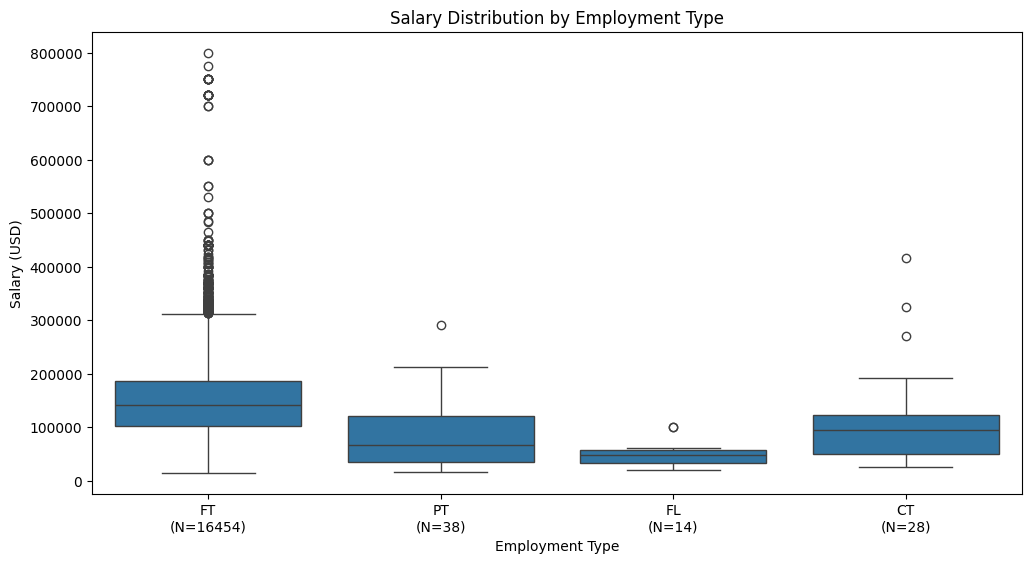

In [18]:
# plot the employment type vs salary in usd distribution

employment_cnt = df['employment_type'].value_counts().sort_index()
df['employment_type_with_cnt'] = df['employment_type'].map(lambda x: f"{x}\n(N={employment_cnt[x]})")

plt.figure(figsize=(12, 6))
sns.boxplot(x='employment_type_with_cnt', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.show()

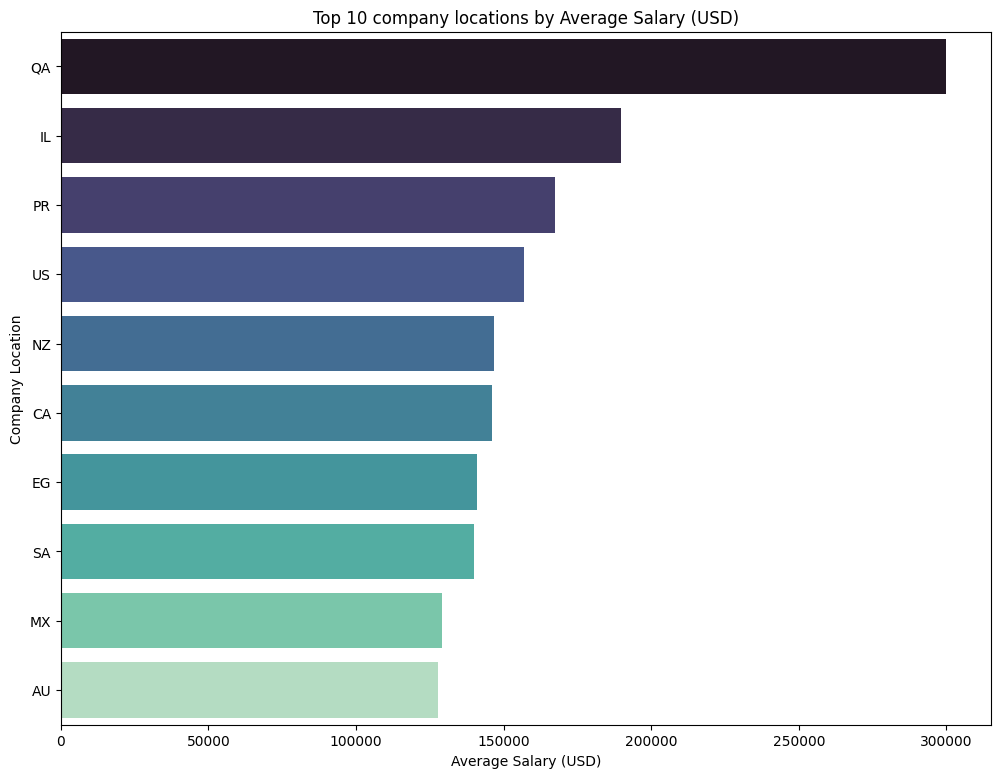

In [19]:
# Top countries by average salary in usd

avg_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
top_10_countries = avg_salary_by_country.head(10)
top_10_countries = top_10_countries.reset_index()

plt.figure(figsize=(12, 9))
sns.barplot(x='salary_in_usd', y='company_location', data=top_10_countries, palette='mako')
plt.title('Top 10 company locations by Average Salary (USD)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Company Location')
plt.show()

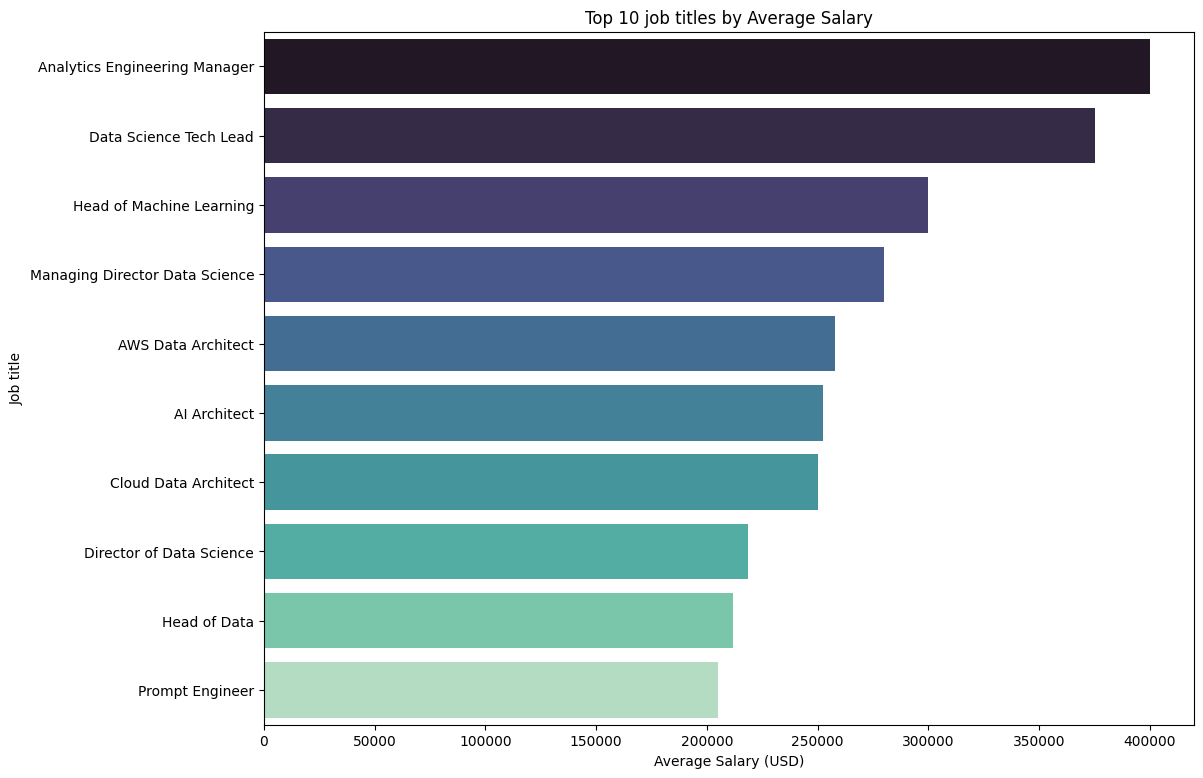

In [20]:
# Job titles with the highest average salary

avg_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
top_10_job_titles = avg_salary_by_job_title.head(10)
top_10_job_titles = top_10_job_titles.reset_index()


plt.figure(figsize=(12, 9))
sns.barplot(x='salary_in_usd', y='job_title', data=top_10_job_titles, palette='mako')
plt.title('Top 10 job titles by Average Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job title')
plt.show()

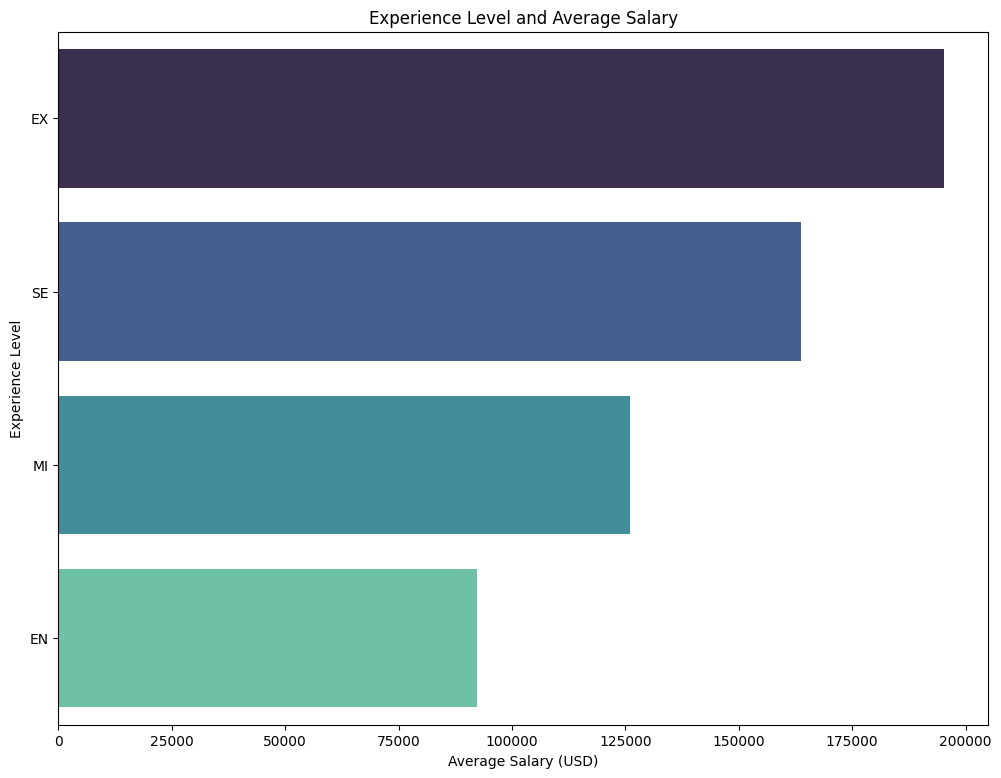

In [23]:
# Relation between the average salary and experience level

avg_salary_by_experience_lvl = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
experience_lvl = avg_salary_by_experience_lvl.head()
experience_lvl = experience_lvl.reset_index()


plt.figure(figsize=(12, 9))
sns.barplot(x='salary_in_usd', y='experience_level', data=experience_lvl, palette='mako')
plt.title('Experience Level and Average Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Experience Level')
plt.show()

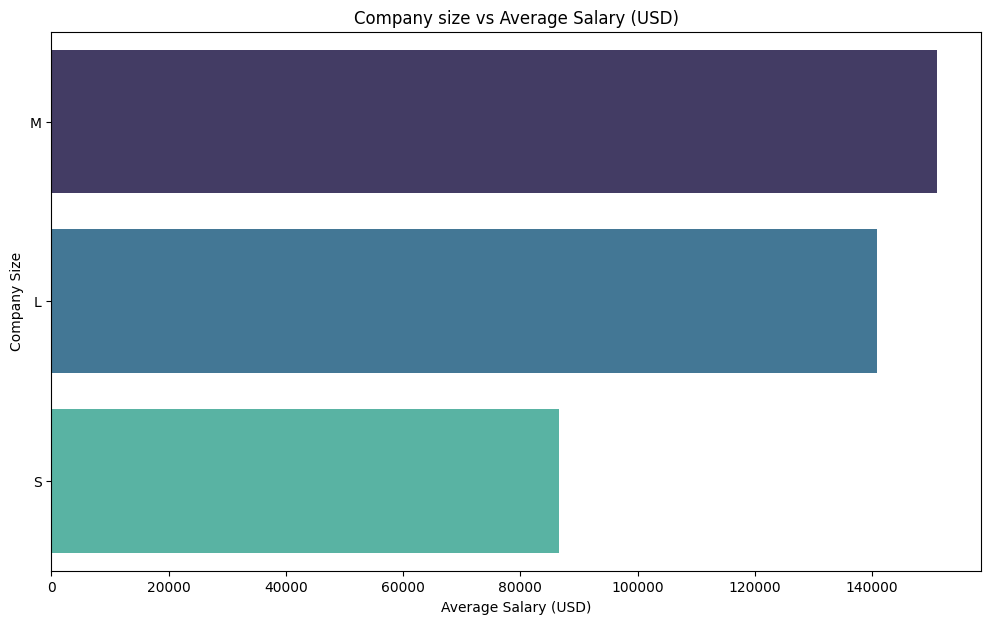

In [24]:
# Relation between company size and average salary

avg_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
company_size = avg_salary_by_company_size.head()
company_size = company_size.reset_index()


plt.figure(figsize=(12, 7))
sns.barplot(x='salary_in_usd', y='company_size', data=company_size, palette='mako')
plt.title('Company size vs Average Salary (USD)')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Company Size')
plt.show()

<Figure size 1200x900 with 0 Axes>

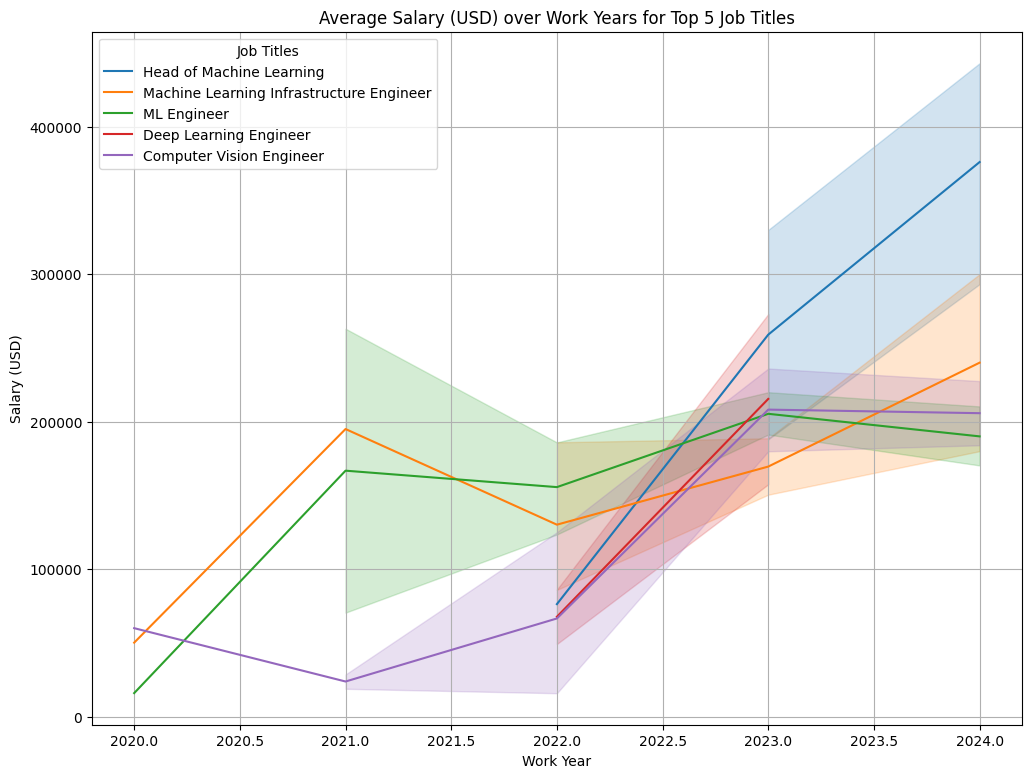

In [26]:
# Average Salary trend by job title

avg_salary_by_job_year = df.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().unstack()
avg_salary_by_job_year['salary_growth'] = avg_salary_by_job_year.diff(axis=1).sum(axis=1)
top_10_job_titles = avg_salary_by_job_year['salary_growth'].sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 9))
plt.figure(figsize=(12, 9))
for job in top_10_job_titles:
    job_data = df[df['job_title'] == job]
    sns.lineplot(x='work_year', y='salary_in_usd', data=job_data, label=job)

plt.title('Average Salary (USD) over Work Years for Top 5 Job Titles')
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.legend(title='Job Titles')
plt.grid(True)
plt.show()